# YOUTUBE APIs
This simple proect is meant to access my youtube channel and create a dataframe of all the videos in my channel. Also it will show the likes, comments and the number of views per video

In [104]:
# import the reuired keys
import requests
import pandas as pd

In [105]:
# This module contains a .py file that has my keys and channle id. You can replace yours with the exact values.
import keys
api_key = keys.api_key
channel_id = keys.channel_id

In [106]:
# make an API call

pageToken = ''
url = 'https://www.googleapis.com/youtube/v3/search?key='+api_key+'&channelId='+channel_id+'&part=snippet,id&order=date&maxResults=1000'+pageToken
client_server = requests.get(url)
response = client_server.json()

In [113]:
# check if the client server response was a success
if client_server.status_code == 200:
    print("Success!")
else:
    print("Request failed with status code:", client_server.status_code)

Success!


In [108]:
def get_videos(api_key, response):
    ''' This function takes two arguments, the api_key and the response and generates a list of videos from that channel'''
    list_of_videos = [] # an empty list that will hold all the video details
    for video in response['items']:
        if video['id']['kind'] == 'youtube#video': # only choose videos 
            results = {
                    'Video ID' : video['id']['videoId'],
                    'Video Title' : str(video['snippet']['title']).replace("&amp;", ''),
                    'Publish Date' : str(video['snippet']['publishedAt']).split("T")[0]
                    }
            video_id = video['id']['videoId'] 
            url_stats = 'https://www.googleapis.com/youtube/v3/videos?id='+video_id+'&part=statistics&key='+api_key # second response for video stats
            response_video_stats = requests.get(url_stats).json()
            for stats in response_video_stats['items']:
                results['View Count'] = stats['statistics']['viewCount']
                results['Like Count'] = stats['statistics']['likeCount']
                results['Comment Count'] = stats['statistics']['commentCount']
            
                list_of_videos.append(results) # append to our list above
    return list_of_videos

In [109]:
# Create a pandas Data Frame from a list of all the videos
my_videos = get_videos(api_key, response)
df = pd.DataFrame(my_videos)
df.drop('Video ID', axis = 1, inplace=True)
df.head(10)

,Video Title,Publish Date,View Count,Like Count,Comment Count
0,Paulo Siria - Yesu iyie Atusujwa,2023-03-14,2568,65,4
1,Samburu Best Gospel Artist | Zakayo Leuria | A...,2023-03-11,2586,72,10
2,Ole Kamoye | Matang`ar Encholiek,2023-03-09,4052,64,6
3,Best Maa Song; Eli Karbolo,2023-03-05,879,44,1
4,Timothy Opoti - Aidimani Live Performance,2023-03-04,23283,346,44
5,Paulo Siria in Kenya | Aachilia Wimbo Mpya ~ M...,2023-02-22,94336,801,96
6,David Tikoi Performs Live at Elangata Enkima,2023-02-21,1475,27,0
7,Benson Meitaya | Maureishoyu Aikata,2023-02-01,1642,49,1
8,Leshao Leshao O Naloakiti enye,2023-01-16,19008,337,23
9,Nchereeni | Thanksgiving,2023-01-14,8911,55,5


In [110]:
# To be able to use the View Count column Convert it from string to int
df['View Count'] = df['View Count'].astype(int)
df.sort_values(by='View Count', ascending=False).head(10)

,Video Title,Publish Date,View Count,Like Count,Comment Count
11,Kamurar Maasai Performs Live | Jamhuri Celebra...,2022-12-13,214644,827,47
15,"Ole Tipis Girls Sings, Aitorisho Ainyorisho Yesu",2022-11-19,124753,626,56
37,Rev. Ole Naiswaku ~ Mataasishore Enkata Part 1,2021-12-21,117042,533,23
39,Rev Ole Naiswaku live at Katakala,2021-12-07,107110,556,26
49,Ole Naiswaku ~ Part 3 ~ Tipat Enashe,2021-10-05,106889,432,24
14,Ole Tipis High School Prayer Day,2022-11-23,100468,524,24
47,Ole Naiswaku Part 4 ~ AGC Mbokishi,2021-10-24,98166,376,20
5,Paulo Siria in Kenya | Aachilia Wimbo Mpya ~ M...,2023-02-22,94336,801,96
24,Bsp Zablon Laizer Katika uzinduzi wa Selina Da...,2022-08-07,93312,427,43
35,Rev Ole Naiswaku | Enkata Part 2,2021-12-28,68746,321,14


### The Top most watched videos plot

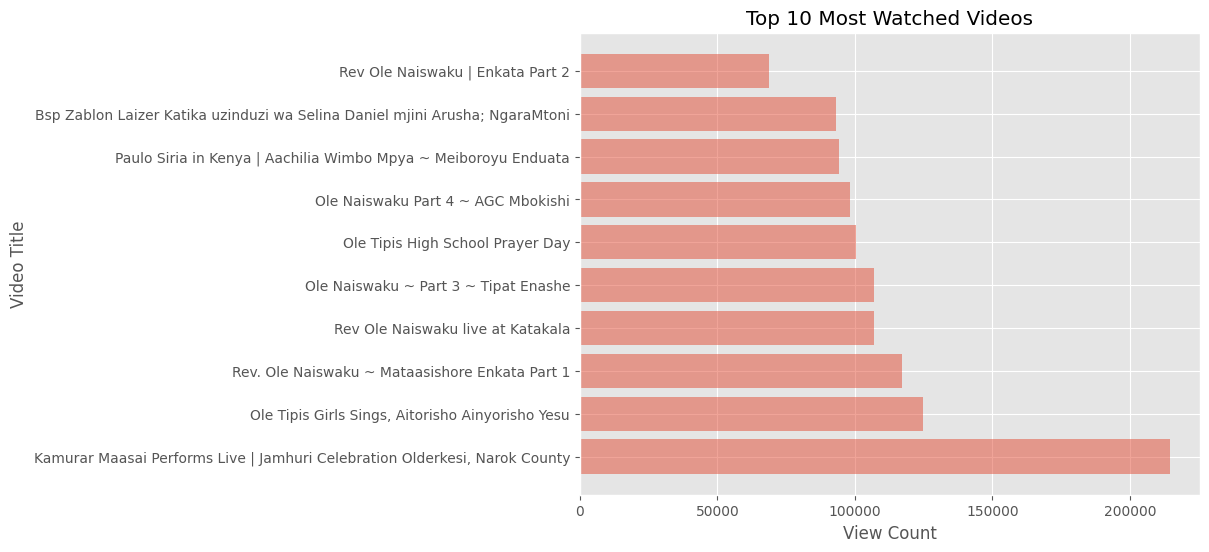

In [111]:
import matplotlib.pyplot as plt
# sort the dataframe by view count
df_sorted = df.sort_values(by='View Count', ascending=False).head(10)

# create a bar plot
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8,6))
ax.barh(df_sorted['Video Title'], df_sorted['View Count'], alpha=0.5)

# set plot title and axis labels
plt.title('Top 10 Most Watched Videos')
plt.ylabel('Video Title')
plt.xlabel('View Count')

# display the plot
plt.show()

In [112]:
### Conclusion
#Below and the Top 10 watched videos, date published, and their view count
df.iloc[:, [0,1,2]].sort_values(by='View Count', ascending=False).head(10)

,Video Title,Publish Date,View Count
11,Kamurar Maasai Performs Live | Jamhuri Celebra...,2022-12-13,214644
15,"Ole Tipis Girls Sings, Aitorisho Ainyorisho Yesu",2022-11-19,124753
37,Rev. Ole Naiswaku ~ Mataasishore Enkata Part 1,2021-12-21,117042
39,Rev Ole Naiswaku live at Katakala,2021-12-07,107110
49,Ole Naiswaku ~ Part 3 ~ Tipat Enashe,2021-10-05,106889
14,Ole Tipis High School Prayer Day,2022-11-23,100468
47,Ole Naiswaku Part 4 ~ AGC Mbokishi,2021-10-24,98166
5,Paulo Siria in Kenya | Aachilia Wimbo Mpya ~ M...,2023-02-22,94336
24,Bsp Zablon Laizer Katika uzinduzi wa Selina Da...,2022-08-07,93312
35,Rev Ole Naiswaku | Enkata Part 2,2021-12-28,68746
